In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df_orig = pd.read_csv("airway_scaledcounts.csv")
df_meta = pd.read_csv("airway_metadata.csv")

In [66]:
data = pd.concat([df_meta, df_orig.set_index("ensgene").T.reset_index()], axis = 1)

In [68]:
clean_data = pd.DataFrame()
for c in data.columns:
    if data[c].dtype == object:
        clean_data[c] = data[c]
    if data[c].dtype == float and np.sum(data[c]) > 10:
        clean_data[c] = data[c]

In [6]:
clean_data

id      dex celltype      geo_id       index  ENSG00000000003  \
0  SRR1039508  control   N61311  GSM1275862  SRR1039508            723.0   
1  SRR1039509  treated   N61311  GSM1275863  SRR1039509            486.0   
2  SRR1039512  control  N052611  GSM1275866  SRR1039512            904.0   
3  SRR1039513  treated  N052611  GSM1275867  SRR1039513            445.0   
4  SRR1039516  control  N080611  GSM1275870  SRR1039516           1170.0   
5  SRR1039517  treated  N080611  GSM1275871  SRR1039517           1097.0   
6  SRR1039520  control  N061011  GSM1275874  SRR1039520            806.0   
7  SRR1039521  treated  N061011  GSM1275875  SRR1039521            604.0   

   ENSG00000000419  ENSG00000000457  ENSG00000000460  ENSG00000000971  ...  \
0            467.0            347.0             96.0           3413.0  ...   
1            523.0            258.0             81.0           3916.0  ...   
2            616.0            364.0             73.0           6000.0  ...   
3            371.0            237.0             66.0           4308.0  ...   
4            582.0            318.0            118.0           6424.0  ...   
5            781.0            447.0             94.0          10723.0  ...   
6            417.0            330.0            102.0           5039.0  ...   
7            509.0            324.0             74.0           7803.0  ...   

   ENSG00000283070  ENSG00000283085  ENSG00000283086  ENSG00000283087  \
0              4.0           1260.0              4.0            190.0   
1              0.0            774.0              5.0            182.0   
2              7.0           1034.0             10.0            332.0   
3              6.0            437.0              1.0            187.0   
4              5.0           1057.0              6.0            332.0   
5              5.0           1129.0             10.0            390.0   
6              1.0           1009.0              3.0            156.0   
7              3.0            722.0              2.0            239.0   

   ENSG00000283088  ENSG00000283091  ENSG00000283094  ENSG00000283100  \
0              1.0             51.0           2187.0            647.0   
1             13.0             42.0           1536.0            570.0   
2             72.0             79.0           2491.0            645.0   
3             13.0             34.0           1253.0            369.0   
4             47.0             87.0           2316.0            688.0   
5             62.0             96.0           2026.0            670.0   
6             36.0             55.0           2000.0            550.0   
7             33.0             51.0           1529.0            572.0   

   ENSG00000283101  ENSG00000283104  
0              3.0             71.0  
1              3.0             70.0  
2              9.0            116.0  
3             10.0             45.0  
4              4.0             95.0  
5             13.0             83.0  
6              7.0             84.0  
7              7.0             79.0  

[8 rows x 19088 columns]

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)

In [9]:
clean_data_numeric = list(clean_data.columns[clean_data.dtypes ==  "float"])

In [10]:
pca.fit(clean_data[clean_data_numeric])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
data_pca = pca.transform(clean_data[clean_data_numeric])

In [12]:
data_pca = pd.concat([df_meta,pd.DataFrame(data_pca, columns = ["pca_1","pca_2"])],axis = 1, )

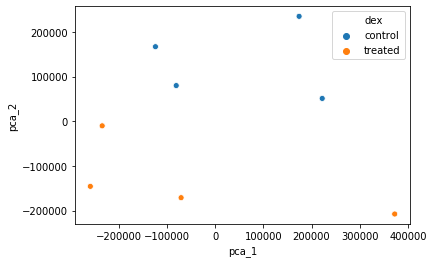

In [13]:
sns.scatterplot(data_pca["pca_1"], data_pca["pca_2"], hue=data_pca.dex);

In [86]:
import rpy2

print(rpy2.__version__)

from rpy2.robjects.packages import importr

base = importr('base')

utils = importr('utils')

import rpy2.robjects.packages as rpackages

utils.chooseCRANmirror(ind=1) # select the first mirror in the list

packnames = ('ggplot2', 'hexbin','BiocManager','read_csv')

from rpy2.robjects.vectors import StrVector

names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]

if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

2.9.4


In [47]:
from rpy2 import robjects

In [48]:
robjects.r('''
        # create a function `f`
        f <- function(r, verbose=FALSE) {
            if (verbose) {
                cat("I am calling f().\n")
            }
            2 * pi * r
        }
        # call the function `f` with argument value 3
        f(3)
        ''')

R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000001C8E1B8E088 / R:0x000001C8DB42E450>
[18.849556]

In [49]:
r_f = robjects.r['f']
print(r_f)

r_f(4)[0] + 5

function(r, verbose=FALSE) {

            if (verbose) {

                cat("I am calling f().

")

            }

            2 * pi * r

        }



In [60]:
def install_custom(custom, manager):
        if not manager:
            biocinstaller = importr("BiocInstaller")
            biocinstaller.biocLite(robjects.vectors.StrVector(custom),suppressUpdates=True)
        else:
            biocinstaller = importr("BiocManager")
            for c in custom:
                if '=' in c:
                    pkg,version= tuple(c.split('='))
                    biocinstaller.install(pkg,ask=False,version=version)
                else:
                    biocinstaller.install(c,ask=False) 

In [61]:
install_custom("edgeR",True)

In [87]:
edger = importr("edgeR")

RRuntimeError: Error in loadNamespace(name) : es gibt kein Paket namens 'read_csv'


In [74]:
df_orig.rename(columns={'ensgene':'symbol'}, inplace=True)

In [80]:
from rpy2.robjects.vectors import FactorVector

In [81]:
group = FactorVector(["1","2","1","2","1","2","1","2"])

In [98]:
reads = utils.read_delim("airway_scaledcounts_R.csv", sep=",")

In [103]:
reads = robjects.r('reads <- read.delim("airway_scaledcounts_R.csv",sep = ",",row.names="symbol")')

In [106]:
dgelist= edger.DGEList(counts=reads, group = group)

In [112]:
keep = edger.filterByExpr(dgelist)

In [118]:
edger.calcNormFactors(dgelist)

R object with classes: ('DGEList',) mapped to:
<ListVector - Python:0x000001C8E87EFC48 / R:0x000001C8E679A6B0>
[Matrix, DataFrame]
  counts: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x000001C8E87CBF48 / R:0x000001C8E54A0010>
[     723,        0,      467,      347, ...,        0,        0,        0,        0]
R object with classes: ('DGEList',) mapped to:
<ListVector - Python:0x000001C8E87EFC48 / R:0x000001C8E679A6B0>
[Matrix, DataFrame]

In [170]:
robjects.r('''
x <- read.delim("airway_scaledcounts_R.csv",sep = ",",row.names="symbol")
group <- factor(c(1,2,1,2,1,2,1,2))
y <- DGEList(counts=x,group=group)
keep <- filterByExpr(y)
y <- y[keep,,keep.lib.sizes=FALSE]
y <- calcNormFactors(y)
design <- model.matrix(~group)
y <- estimateDisp(y,design)
''');

In [171]:
robjects.r('''
fit <- glmQLFit(y,design)
qlf <- glmQLFTest(fit,coef=2)
top <- topTags(qlf)
gene_names <- row.names(top)
''');

In [186]:
from rpy2.robjects import pandas2ri
import mygene

top = robjects.r['top']
top_df = pd.DataFrame(pandas2ri.ri2py_vector(top[0]))

g_names = robjects.r['gene_names']
g_names = list(g_names)

mg = mygene.MyGeneInfo()
gene_dict = mg.querymany(g_names,scopes='ensembl.gene')
trans_g_names = [gene_dict[i]["symbol"] for i in range(len(g_names))]
top_df.index = trans_g_names

top_df

querying 1-10...done.
Finished.


logFC    logCPM           F        PValue       FDR
PER1     2.864503  5.079485  311.015454  4.185936e-08  0.000352
SPARCL1  4.366974  5.440028  302.732544  4.693055e-08  0.000352
ARHGEF2 -1.035587  6.694059  248.691728  1.076859e-07  0.000352
MAOA     3.341153  6.759023  235.915685  1.344471e-07  0.000352
PHC2     1.439419  7.058140  234.724780  1.373386e-07  0.000352
DUSP1    2.964412  7.287927  213.816591  2.031771e-07  0.000352
KCTD12  -2.489460  6.931440  213.157922  2.058212e-07  0.000352
DNM1    -1.850263  5.492352  205.215346  2.412973e-07  0.000352
SMIM3    1.278675  5.674972  197.252430  2.847255e-07  0.000352
STOM     1.426753  9.259155  196.909215  2.868050e-07  0.000352